<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221023_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterators

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, timezone, time, timedelta, date

import os
import re 

from functools import reduce
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'mock_sales_data.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'sales.csv',
 '1_customers_dataset.csv',
 '1_orders_dataset.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [4]:
df_ord = pd.read_csv('1_orders_dataset.csv')
df_pay = pd.read_csv('1_order_payments_dataset.csv').drop('Unnamed: 0', axis = 1)
df = pd.merge(df_ord, df_pay, 'left', 'order_id')
df = df[['customer_id', 'order_purchase_timestamp', 'payment_type', 'payment_installments', 'payment_value']]
df.columns = ['id', 'log_date', 'type', 'install', 'rev']
df.head()

,id,log_date,type,install,rev
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12
1,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00
2,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 8:38:49,credit_card,3.0,179.12


In [5]:
list_id = dict(zip(df['id'].unique(), range(len(df['id'].unique()))))
df = df.assign(id = df['id'].apply(lambda x : list_id.get(x, x)))
df.head()

,id,log_date,type,install,rev
0,0,2017-10-02 10:56:33,credit_card,1.0,18.12
1,0,2017-10-02 10:56:33,voucher,1.0,2.00
2,0,2017-10-02 10:56:33,voucher,1.0,18.59
3,1,2018-07-24 20:41:37,boleto,1.0,141.46
4,2,2018-08-08 8:38:49,credit_card,3.0,179.12


In [6]:
res = list()
for type_ in df['type'].unique() :

  temp = df[df['type'] == type_]
  temp = temp[['install', 'rev']].corr()
  res.append(temp)

res[0]

,install,rev
install,1.000000,0.376498
rev,0.376498,1.000000


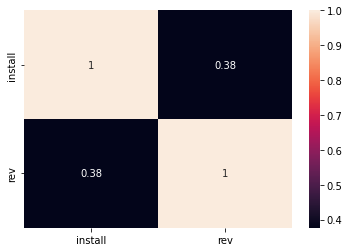

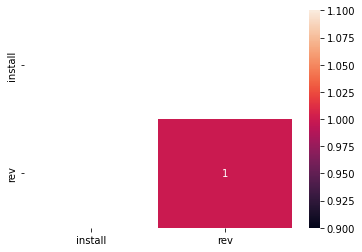

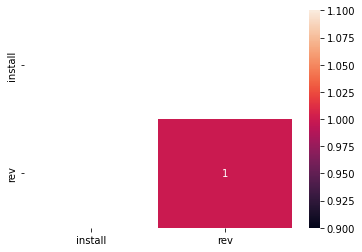

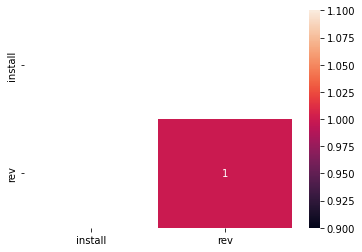

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered


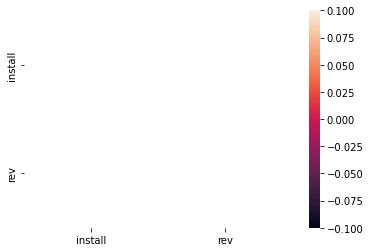

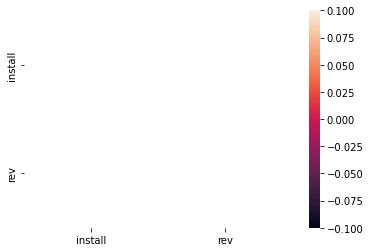

In [7]:
for i in range(6) :
  sns.heatmap(res[i], annot = True)
  plt.show()

In [16]:
df['log_date'] = pd.to_datetime(df['log_date'])
df['date'] = df['log_date'].to_numpy('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,id,log_date,type,install,rev,date,week
0,0,2017-10-02 10:56:33,credit_card,1.0,18.12,2017-10-02,2017-10-02
1,0,2017-10-02 10:56:33,voucher,1.0,2.00,2017-10-02,2017-10-02
2,0,2017-10-02 10:56:33,voucher,1.0,18.59,2017-10-02,2017-10-02
3,1,2018-07-24 20:41:37,boleto,1.0,141.46,2018-07-24,2018-07-23
4,2,2018-08-08 08:38:49,credit_card,3.0,179.12,2018-08-08,2018-08-06


In [20]:
df_ = df.groupby(['id','week'])['rev'].sum().reset_index().sort_values(['id','week'])
df_.head()

,id,week,rev
0,0,2017-10-02,38.71
1,1,2018-07-23,141.46
2,2,2018-08-06,179.12
3,3,2017-11-13,72.20
4,4,2018-02-12,28.62


# Iterators

In [91]:
mat = [list('ABC'), list('DEF'), list('GHI')]
arr = np.empty([3,3], dtype = 'object')

a = [{letter : [r, c]} for r, rows in enumerate(mat) for c, letter in enumerate(rows)]

for b in a : 
  for k, v in b.items() :
    arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)